## DL project colab notebook



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!git clone https://github.com/lucarezzonico/Deep_Learning

fatal: destination path 'Deep_Learning' already exists and is not an empty directory.


In [4]:
%cd Deep_Learning/Miniproject_1

/content/Deep_Learning/Miniproject_1


In [5]:
import torch
from torch import nn
from torch import optim

import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import matplotlib.pyplot as plt

from model import Model

# import torch.utils.data as utils
# from torchvision import datasets, transforms
# from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
# %matplotlib inline

Load Data and show some images

noisy_imgs_train_1 torch.Size([50000, 3, 32, 32]) noisy_imgs_train_2 torch.Size([50000, 3, 32, 32])
noisy_imgs_valid torch.Size([1000, 3, 32, 32]) clean_imgs_valid torch.Size([1000, 3, 32, 32])


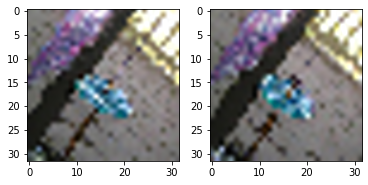

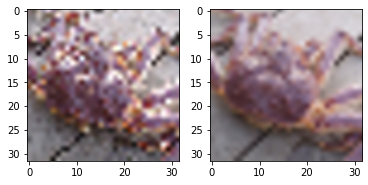

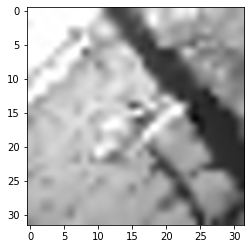

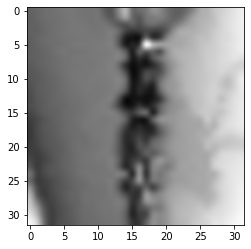

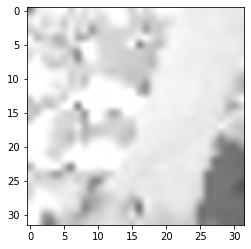

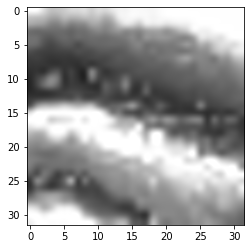

In [6]:
# Read the data from the file
noisy_imgs_train_1, noisy_imgs_train_2 = torch.load(open('/content/drive/MyDrive/Colab Notebooks/DL colabs/miniproject_dataset/train_data.pkl', 'rb'))
noisy_imgs_valid, clean_imgs_valid = torch.load(open('/content/drive/MyDrive/Colab Notebooks/DL colabs/miniproject_dataset/val_data.pkl', 'rb'))

noisy_imgs_train_1 = noisy_imgs_train_1.float()/255
noisy_imgs_train_2 = noisy_imgs_train_2.float()/255


print('noisy_imgs_train_1', noisy_imgs_train_1.size(), 'noisy_imgs_train_2', noisy_imgs_train_2.size())
print('noisy_imgs_valid', noisy_imgs_valid.size(), 'clean_imgs_valid', clean_imgs_valid.size())

def plot_images(img):
    for i in range(img.size(dim=0)):
        plt.imshow(img[i, :, :, :].permute((1, 2, 0)), interpolation='spline16')
        plt.show()

def plot_pair_of_images(img1, img2):
    _, axes = plt.subplots(1, 2)
    for i in range(img1.size(dim=0)):
        axes[0].imshow(img1[i, :, :, :].permute((1, 2, 0)), interpolation='spline16')
        axes[1].imshow(img2[i, :, :, :].permute((1, 2, 0)), interpolation='spline16')
        plt.show()

plot_pair_of_images(noisy_imgs_train_1[0:4, :, :, :], noisy_imgs_train_2[0:4, :, :, :])
plot_pair_of_images(noisy_imgs_valid[0:4, :, :, :], clean_imgs_valid[0:4, :, :, :])


# transform data
my_transforms = transforms.Compose(
    [   # Compose makes it possible to have many transforms
        # transforms.ToPILImage(),
        transforms.Resize((36, 36)),  # Resizes (32,32) to (36,36)
        transforms.RandomCrop((32, 32)),  # Takes a random (32,32) crop
        transforms.ColorJitter(brightness=0.5),  # Change brightness of image
        transforms.RandomRotation(degrees=45),  # Perhaps a random rotation from -45 to 45 degrees
        transforms.RandomHorizontalFlip(p=0.5),  # Flips the image horizontally with probability 0.5
        transforms.RandomVerticalFlip(p=0.05),  # Flips image vertically with probability 0.05
        transforms.RandomGrayscale(p=0.2),  # Converts to grayscale with probability 0.2
        # transforms.ToTensor(),  # Finally converts PIL image to tensor so we can train w. pytorch
        # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Note: these values aren't optimal
    ]
)

transformed_imgs = my_transforms(noisy_imgs_train_1[0:4, :, :, :])
plot_images(transformed_imgs)


Train

In [ ]:
model = Model()
model.train(noisy_imgs_train_1, noisy_imgs_train_2)


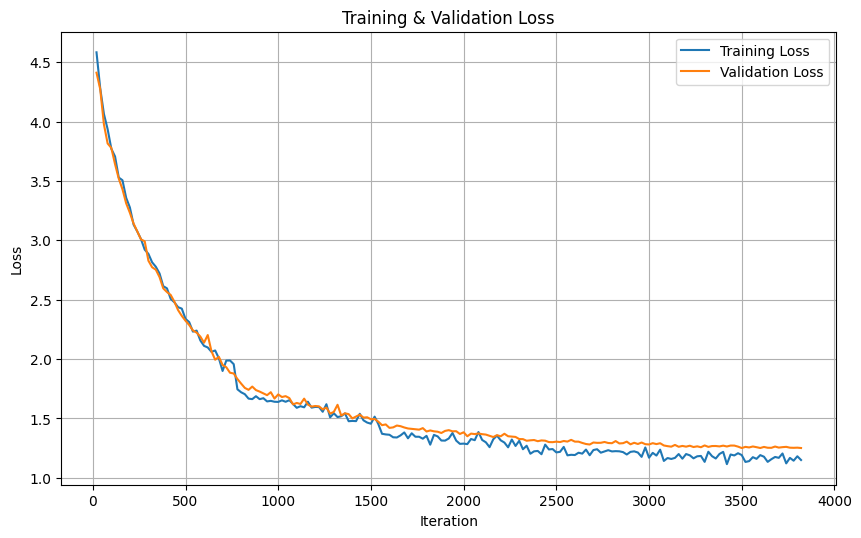

In [ ]:
# Plotting the loss history for different learning rates
plt.plot((np.arange(np.shape(loss_history_training)[0])+1)*print_every, loss_history_training, label='Training Loss')
plt.plot((np.arange(np.shape(loss_history_validation)[0])+1)*print_every, loss_history_validation, label='Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend(bbox_to_anchor = (1, 1))
plt.grid()
plt.show() # Load the display window

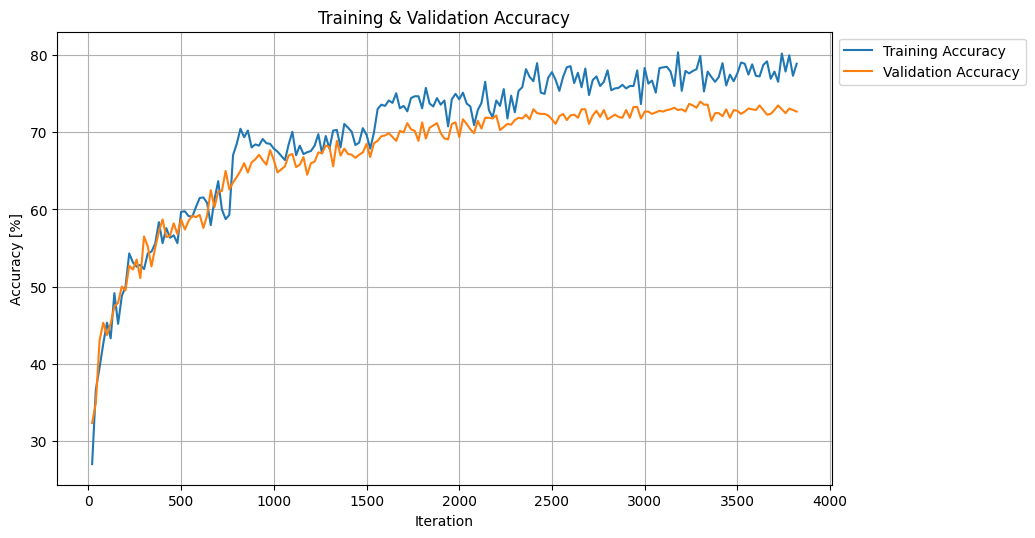

In [ ]:
# Plotting the loss history for different learning rates
plt.plot((np.arange(np.shape(accuracy_history_training)[0])+1)*print_every, accuracy_history_training, label='Training Accuracy')
plt.plot((np.arange(np.shape(accuracy_history_validation)[0])+1)*print_every, accuracy_history_validation, label='Validation Accuracy')
plt.xlabel("Iteration")
plt.ylabel("Accuracy [%]")
plt.title("Training & Validation Accuracy")
plt.legend(bbox_to_anchor = (1, 1))
plt.grid()
plt.show() # Load the display window

Save best trained model.

In [ ]:
## You should be familiar with how to save a pytorch model (Make sure to save the model in your Drive)

torch.save(net.state_dict(), 'drive/MyDrive/Colab Notebooks/tp_3/ConvNN.ckpt')

In [ ]:
checkpoint = torch.load("drive/MyDrive/Colab Notebooks/tp_3/ConvNN.ckpt")
net.load_state_dict(checkpoint)

<All keys matched successfully>